<a href="https://colab.research.google.com/github/tvaditya/AndroidProjects/blob/master/C%C3%B3pia_de_Futebol_com_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret -q

     |████████████████████████████████| 319 kB 12.2 MB/s 
     |████████████████████████████████| 261 kB 39.9 MB/s 
     |████████████████████████████████| 1.7 MB 29.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 116 kB 52.6 MB/s 
     |████████████████████████████████| 6.8 MB 43.8 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 2.0 MB 58.2 MB/s 
     |████████████████████████████████| 86 kB 6.5 MB/s 
     |████████████████████████████████| 1.3 MB 41.0 MB/s 
     |████████████████████████████████| 167 kB 70.4 MB/s 
     |████████████████████████████████| 16.5 MB 67.8 MB/s 
     |████████████████████████████████| 303 kB 72.1 MB/s 
     |████████████████████████████████| 636 kB 51.8 MB/s 
     |████████████████████████████████| 102 kB 12.2 MB/s 
     |████████████████

In [2]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("resultado_new.csv")

In [5]:
data = df

In [6]:
test = data.sample(frac=0.30)
train = data.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [7]:
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
# clf = setup(data=train, target='Result')

In [8]:
clf = setup(data = data,
            target = 'Result',
            normalize = True,
            transformation = True, 
            ignore_low_variance = True,
            # remove_multicollinearity = True, multicollinearity_threshold = 0.95,
            log_experiment = True,
            experiment_name = 'football_results_01')

,Description,Value
0,session_id,7914
1,Target,Result
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(380, 39)"
5,Missing Values,False
6,Numeric Features,34
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


2022/04/04 22:56:30 INFO mlflow.tracking.fluent: Experiment with name 'football_results_01' does not exist. Creating a new experiment.


In [9]:
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.5134,0.6530,0.4786,0.5305,0.5160,0.2313,0.2351,0.021
ridge,Ridge Classifier,0.5095,0.0000,0.4571,0.5061,0.4993,0.2018,0.2057,0.014
dummy,Dummy Classifier,0.4944,0.5000,0.3333,0.2446,0.3273,0.0000,0.0000,0.015
rf,Random Forest Classifier,0.4866,0.5959,0.3863,0.4200,0.4256,0.0974,0.1127,0.507
lr,Logistic Regression,0.4752,0.6011,0.4081,0.4730,0.4604,0.1322,0.1371,0.653
svm,SVM - Linear Kernel,0.4678,0.0000,0.4186,0.4670,0.4619,0.1501,0.1519,0.063
knn,K Neighbors Classifier,0.4640,0.5278,0.3673,0.4044,0.4088,0.0566,0.0659,0.121
et,Extra Trees Classifier,0.4593,0.6104,0.3620,0.3934,0.4088,0.0634,0.0674,0.464
gbc,Gradient Boosting Classifier,0.4453,0.5871,0.3732,0.4274,0.4172,0.0819,0.0874,0.572
ada,Ada Boost Classifier,0.4417,0.5464,0.3985,0.4385,0.4327,0.1056,0.1075,0.119


In [10]:
print(best)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


In [11]:
lda = create_model('lda')
print(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5556,0.7597,0.5238,0.5719,0.5606,0.2910,0.2930
1,0.4815,0.6164,0.4652,0.5039,0.4892,0.2025,0.2043
2,0.3333,0.5677,0.2747,0.3349,0.3337,-0.0519,-0.0521
3,0.6296,0.6751,0.5897,0.6380,0.6246,0.3919,0.3988
4,0.5185,0.6765,0.4689,0.4889,0.5009,0.2200,0.2221
5,0.5000,0.5917,0.4750,0.5372,0.5046,0.2387,0.2460
6,0.6154,0.7087,0.5739,0.6048,0.6024,0.3548,0.3619
7,0.3462,0.5670,0.2967,0.3846,0.3643,-0.0279,-0.0281
8,0.5769,0.6352,0.5702,0.6571,0.6007,0.3602,0.3711


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


In [12]:
tuned_lda = tune_model(lda, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5556,0.7550,0.5238,0.5719,0.5606,0.2910,0.2930
1,0.4815,0.6193,0.4652,0.4969,0.4865,0.1923,0.1936
2,0.3704,0.5680,0.3004,0.3554,0.3622,-0.0066,-0.0066
3,0.6296,0.6714,0.5897,0.6380,0.6246,0.3919,0.3988
4,0.5185,0.6817,0.4689,0.4889,0.5009,0.2200,0.2221
5,0.5000,0.5917,0.4750,0.5378,0.5013,0.2404,0.2512
6,0.6154,0.6979,0.5739,0.6048,0.6024,0.3548,0.3619
7,0.3846,0.5592,0.3223,0.4038,0.3935,0.0165,0.0166
8,0.5385,0.6294,0.5446,0.6337,0.5602,0.3128,0.3266


In [13]:
print(tuned_lda)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.001,
                           solver='lsqr', store_covariance=False, tol=0.0001)


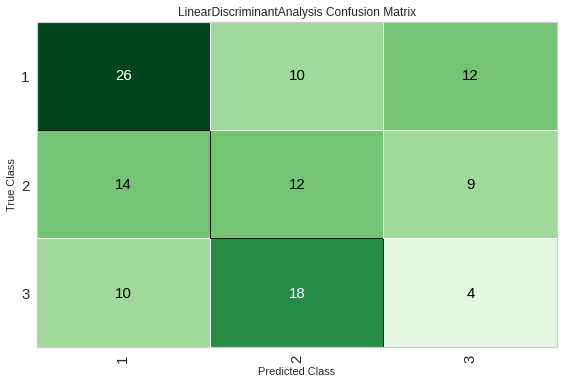

In [14]:
plot_model(tuned_lda, plot='confusion_matrix')

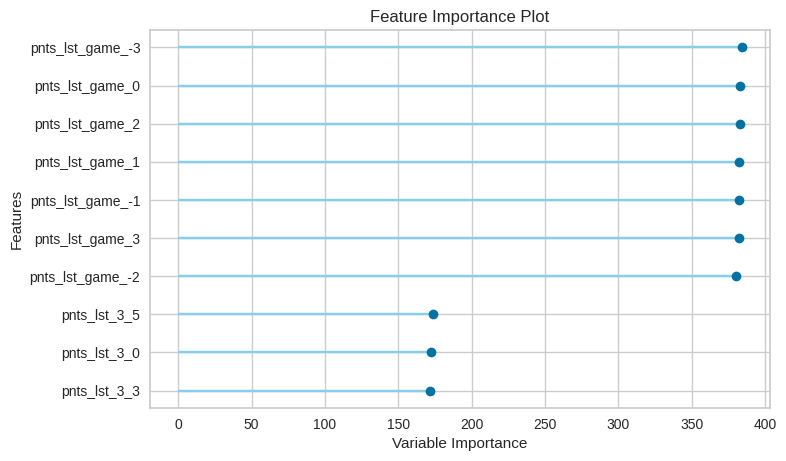

In [15]:
plot_model(tuned_lda, plot='feature')

In [16]:
evaluate_model(tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# predict_model(tuned_rf);

In [18]:
predictions = predict_model(tuned_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.3652,0.5485,0.3365,0.3529,0.3579,0.0267,0.0268


IndexError: ignored

In [22]:
predictions.head()

NameError: ignored

In [ ]:
final_rf = finalize_model(tuned_rf)

In [ ]:
# test_preds = predict_model(final_rf, data=test)
save_model(final_rf,'Modelo_Final_Futebol_2022_04_04')

In [ ]:
# carregando um modelo salvo
saved_final_gbr = load_model('Modelo_Final_Futebol_2022_04_04')